In [4]:
import pandas as pd
import numpy as np
import json

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [5]:
train_avg = pd.read_csv('./train_avg.csv')
test_avg = pd.read_csv('./test_avg.csv')
valid_avg = pd.read_csv('./valid_avg.csv')
valid_whole = pd.read_csv('./df_valid_bertweet.csv')
df_data = pd.read_csv('./data_notembeded.csv')

In [4]:
df_data.head(3)

,isRumor,text,hasURL,urls,urls_expanded,hasUserURL,user_url,text_token,isNotOnlyText,Noun,...,token_avg290,token_avg291,token_avg292,token_avg293,token_avg294,token_avg295,token_avg296,token_avg297,token_avg298,token_avg299
0,1,BREAKING: Armed man takes hostage in kosher gr...,1,['http://t.co/PBs3sMwhLt'],['http://htz.li/1lI'],1,http://www.haaretz.com,"['breaking', 'armed', 'man', 'takes', 'hostage...",1,6,...,0.062943,0.132718,0.133037,-0.026727,0.031101,-0.130553,-0.055182,0.257094,0.000888,-0.071521
1,1,"#CharlieHebdo killers dead, confirmed by genda...",0,[],[],1,http://www.agnespoirier.org,"['charliehebdo', 'killers', 'dead', 'confirmed...",0,2,...,0.043733,0.111315,-0.040369,-0.014255,-0.099877,-0.110036,0.002233,0.145399,-0.059819,-0.187999
2,1,"Top French cartoonists Charb, Cabu, Wolinski, ...",0,[],[],1,http://t.co/EWb7m4orG8,"['top', 'french', 'cartoonists', 'charb', 'cab...",0,3,...,0.002403,0.190812,-0.018724,-0.041470,-0.039200,-0.130378,-0.011311,0.188351,0.000401,-0.217772


In [6]:
import re 
def Find(string): 
    # findall() has been used  
    # with valid conditions for urls in string 
    regex = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"
    url = re.findall(regex,string)       
    return [x[0] for x in url] 

In [7]:
data_urls = df_data['urls_expanded']
data_urls = pd.DataFrame([Find(data_urls[i]) for i, d in enumerate(data_urls)]).add_prefix('url')

## Number of URLs


                0
url0  url1       
False False  3447
True  False  2312
      True     43

      NumOfUrls
0             1
1             0
2             0
3             2
4             1
...         ...
5797          1
5798          0
5799          1
5800          1
5801          0

[5802 rows x 1 columns]


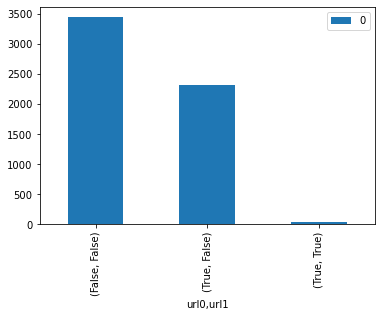

In [136]:
data_urls = df_data['urls_expanded']
data_urls = pd.DataFrame([Find(data_urls[i]) for i, d in enumerate(data_urls)]).add_prefix('url')
data_urls_bool = data_urls.astype(bool)
print("\n{}".format(pd.DataFrame(data_urls_bool.value_counts())))
pd.DataFrame(data_urls_bool.value_counts()).plot(kind='bar')
data_urls_sum = pd.DataFrame(data_urls_bool[data_urls_bool==True].count(axis=1), columns=['NumOfUrls'])
print('\n{}'.format(data_urls_sum))
data_urls_sum.to_csv('./urls_sum.csv', index = False)


               0
url0  url1      
True  False  242
False False  144
True  True     4

     NumOfUrls
0            0
1            0
2            1
3            0
4            1
..         ...
385          1
386          0
387          0
388          0
389          1

[390 rows x 1 columns]


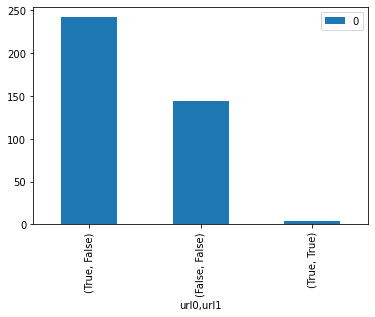

In [140]:
data_urls = valid_whole['urls_expanded']
data_urls = pd.DataFrame([Find(data_urls[i]) for i, d in enumerate(data_urls)]).add_prefix('url')
data_urls_bool = data_urls.astype(bool)
print("\n{}".format(pd.DataFrame(data_urls_bool.value_counts())))
pd.DataFrame(data_urls_bool.value_counts()).plot(kind='bar')
data_urls_sum = pd.DataFrame(data_urls_bool[data_urls_bool==True].count(axis=1), columns=['NumOfUrls'])
print('\n{}'.format(data_urls_sum))
data_urls_sum.to_csv('./valid_urls_sum.csv', index = False)

# Getting externel links

In [8]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Function

In [9]:
def build_dataset(seed_urls):
    # print(seed_urls)
    news_data = []
    # for link in urls_list
    for index, url in enumerate(seed_urls):
        if url == None:
            break
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        tags=soup.findAll('img')
        
        news_data.extend(tags)
        
    return news_data

### Example code for a row of links

In [21]:
seed_urls = data_urls.iloc[3].tolist()
news_df = build_dataset(seed_urls)

print("Number of the image tags:",len(news_df))

Number of the image tags: 227


In [22]:
for image in news_df:
    print(image['src'],"\n")
[image['src'] for image in news_df]

er-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7 

//cdn.cnn.com/cnnnext/dam/assets/150107065511-04-paris-shooting-0107-super-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7 

//cdn.cnn.com/cnnnext/dam/assets/150107080632-13-paris-shooting-0107-super-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7 

//cdn.cnn.com/cnnnext/dam/assets/150107191853-36-paris-shooting-0107-super-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7 

//cdn.cnn.com/cnnnext/dam/assets/150107112350-29-paris-shooting-0107-restricted-super-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7 

//cdn.cnn.com/cnnnext/dam/assets/150107065554-05-paris-shooting-0107-super-169.jpg 

data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP//

AP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7',
 '//cdn.cnn.com/cnnnext/dam/assets/150107191853-36-paris-shooting-0107-super-169.jpg',
 'data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7',
 '//cdn.cnn.com/cnnnext/dam/assets/150107112350-29-paris-shooting-0107-restricted-super-169.jpg',
 'data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7',
 '//cdn.cnn.com/cnnnext/dam/assets/150107065554-05-paris-shooting-0107-super-169.jpg',
 'data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7',
 '//cdn.cnn.com/cnnnext/dam/assets/150107100538-19-paris-shooting-0107-super-169.jpg',
 'data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAIKlI+py+0Po5yUFQA7',
 '//cdn.cnn.com/cnnnext/dam/assets/150107104647-27-paris-shooting-0107-super-169.jpg',
 'data:image/gif;base64,R0lGODlhEAAJAJEAAAAAAP///////wAAACH5BAEAAAIALAAAAAAQAAkAAAI

## Retreving External link as separate columns

In [10]:
def mass_urls(data_rows):
    return build_dataset(data_rows)

In [11]:
data_urls[0:100]

,url0,url1
0,http://htz.li/1lI,None
1,None,None
2,None,None
3,http://cnn.it/1xYDHvp,https://amp.twimg.com/v/7d7ecf3e-0965-41ca-afa...
4,http://on.rt.com/k5ivya,None
...,...,...
95,None,None
96,None,None
97,http://www.itv.com/news/story/2015-01-08/polic...,None
98,None,None


In [12]:
result = [mass_urls([x, y]) for x, y in zip(data_urls['url0'][0:100], data_urls['url1'][0:100])]

In [74]:
# source = [[image['src'] for image in tags] for tags in result]

In [109]:
sourceLen

,len0
0,3
1,0
2,0
3,227
4,0
...,...
95,0
96,0
97,0
98,0


In [72]:
sourceLen.plot(kind=bar)

NameError: name 'bar' is not defined

In [ ]:
# Exporting

In [131]:
data_urls_sum.to_csv('./urls_sum.csv', index = False)